# 1. 保守性分析

## (1). 进行序列对齐

In [1]:

data_dir = 'filter_dataset/'
align_dir = 'align_result/'

# family_name = 'PF00959'
# threshold = 0.8
# data_size = 500

# family_name = 'PF01832'
# threshold = 0.7
# data_size = 500

# family_name = 'PF05838'
# threshold = 0.7
# data_size = 500

# family_name = 'PF06737'
# threshold = 0.55
# data_size = 500

family_name = 'PF16754'
threshold = 0.9
data_size = 200

family_dict = {'PF00959':0, 'PF01832':1, 'PF05838':2, 'PF06737':3,'PF16754':4}
family_list = ['PF00959', 'PF01832', 'PF05838', 'PF06737','PF16754']

## (2). 计算保守性分数

In [2]:
from Bio import SeqIO
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# 计算香农熵
def compute_entropy(sequence):
    counts = {}
    total = 0
    for aa in sequence:
        # if aa != '-':
        total += 1
        if aa in counts:
            counts[aa] += 1
        else:
            counts[aa] = 1

    entropy = 0
    for count in counts.values():
        p = count / total
        entropy -= p * np.log2(p)

    return entropy

def compute_conservation(align_file):
    # 读取fasta文件并获取所有序列
    sequences = list(SeqIO.parse(align_file, "fasta"))
    print(f"对齐后的序列长度为：{len(sequences[0])}")
    # 获取序列长度
    length = len(sequences[0])
    # 计算每个位置的保守性
    conservation_artificial = []
    conservation_natural = []
    for i in range(length): # 遍历每一个位点
        column_nature = [sequence[i] for sequence in sequences if "natural" in sequence.id]
        column_artificial = [sequence[i] for sequence in sequences if "artificial" in sequence.id]
        # print(Counter(column_nature)) # 调试
        # print(Counter(column_artificial)) # 调试
        # 当前位点的缺失值小于阈值时，计算保守性
        if column_artificial.count('-') + column_nature.count('-') < (len(column_artificial) + len(column_nature)) * threshold:
            entropy_artificial = compute_entropy(column_artificial)
            # print(entropy_artificial) # 调试
            normalized_entropy1 = 0
            if(len(set(column_artificial)) == 1):
                normalized_entropy1 = 0
            else:
                normalized_entropy1 = entropy_artificial / np.log2(len(set(column_artificial)))
            conservation_artificial.append(normalized_entropy1)
            

            entropy_natural = compute_entropy(column_nature)
            # print(entropy_natural)    # 调试
            normalized_entropy = 0
            if(len(set(column_nature)) == 1):
                normalized_entropy = 0
            else:
                normalized_entropy = entropy_natural / np.log2(len(set(column_nature)))
            conservation_natural.append(normalized_entropy)
    
    return conservation_artificial, conservation_natural


align_file = align_dir + family_name+'_align.fasta'
entropy_scores_nature, entropy_scores_artificial = compute_conservation(align_file)

# 创建一个位点的序列（1开始）
positions_artificial = np.arange(1, len(entropy_scores_artificial) + 1)
positions_natrue = np.arange(1, len(entropy_scores_nature) + 1)



对齐后的序列长度为：2872


In [3]:
# 设置全局字体为times new roman和字体大小
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 30

x_font_size = 30
y_font_size = 30
title_font_size = 30
legend_font_size = 30

color_blue = '#2878b5'
color_orange = '#D87C7C'


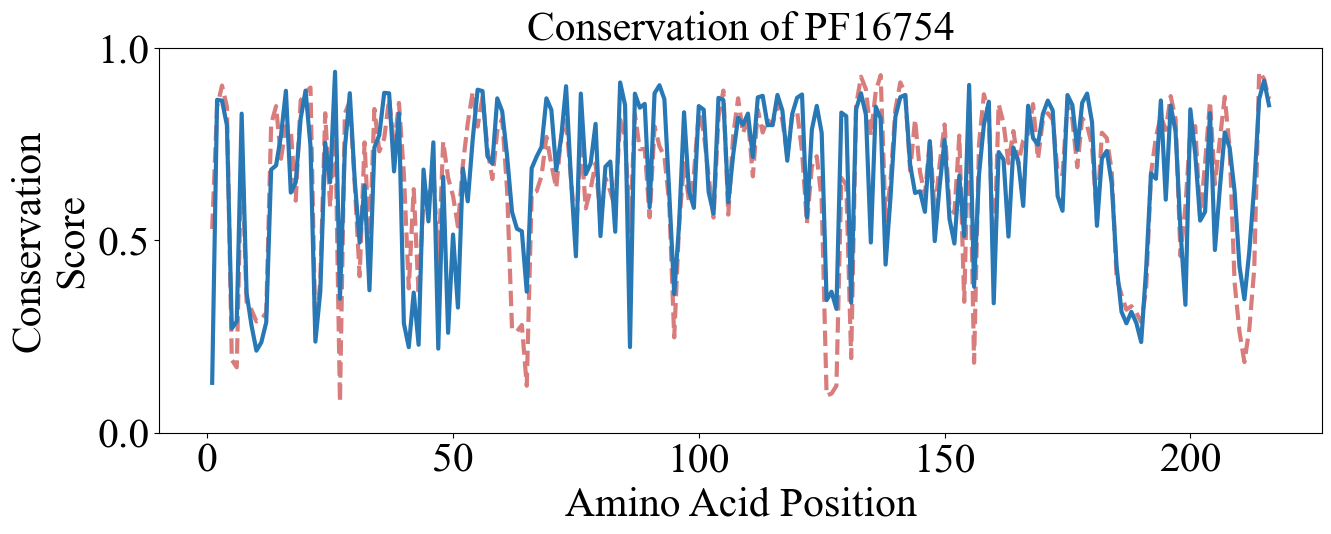

In [4]:


# 使用 Matplotlib 绘制保守性分数
plt.figure(figsize=(15, 5))
plt.plot(positions_natrue, entropy_scores_nature, linewidth=3, alpha=1, color=color_orange, linestyle='dashed')
plt.plot(positions_artificial, entropy_scores_artificial, linewidth=3, alpha=1, color=color_blue)
# plt.legend(['natural', 'artificial'], fontsize=legend_font_size)
plt.xlabel(f'Amino Acid Position', fontsize=x_font_size)
# 纵坐标的标签步长设置为0.5
plt.yticks(np.arange(0, 1.1, 0.5))
plt.ylabel('Conservation\nScore', fontsize=y_font_size)
plt.title(f'Conservation of {family_name}', fontsize=title_font_size)
plt.ylim(0, 1)
plt.savefig(rf"picture\{family_name}.png")
plt.show()